In [1]:
import requests
headers = {'User-Agent': 'xingzhe.li@ccc.ox.ac.uk'}
import pandas as pd
import yfinance as yf
from search import Reader


/Users/xl/opt/anaconda3/lib/python3.9/site-packages/pinecone/index.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
companyTickers = requests.get("https://www.sec.gov/files/company_tickers.json", headers = headers)
company_dict = companyTickers.json()
companies = pd.DataFrame.from_dict(company_dict, orient = 'index')
companies

In [21]:
def evaluation(tick):

    ticker = yf.Ticker(tick)
    stmt = ticker.income_stmt
    bs = ticker.balance_sheet
    cf = ticker.cashflow
    info = ticker.info
    values = {}
    try:
        values['total divident payed'] = info['payoutRatio']*bs.loc['Ordinary Shares Number'][0]
    except:
        values['revenue'] = None
    try:
        values['net income'] = stmt.loc['Net Income'][0]
    except:
        values['net income'] = None
    try:
        values['ebit'] = stmt.loc['EBIT'][0]
    except:
        values['ebit'] = None
    try:
        values['effective tax rate'] = stmt.loc['Tax Rate For Calcs'][0]
    except:
        values['effective tax rate'] = None
    try:
        values['total debt'] = bs.loc['Total Debt'][0]
    except:
        values['total debt'] = None
    try:
        values['free cash flow'] = cf.loc['Free Cash Flow'][0]
    except:
        values['free cash flow'] = None
    try:
        values['total asset'] = bs.loc['Total Assets'][0]
    except:
        values['total asset'] = None
    return values

In [4]:
df = companies.head(10)
read = Reader('vela-test14', 'xingzhe.li@ccc.ox.ac.uk', target = df)

In [5]:
#read.download_all()

In [6]:
#read.upload_all()

In [7]:
AI_dict = []
i = 0
l = 1
for index, row in df.iterrows():
    things = ['total divident payed', 'net income', 'ebit', 'effective tax rate', 'total asset', 'total debt', 'free cash flow'] #'shares', 'capex', 'fcf'
    values = {}
    for thing in things:
        print(thing)
        values[thing] = read.search(row['title'], row['ticker'], '2022', thing)
    values['ticker'] = row['ticker']
    AI_dict.append(values)
    i += 1
    print(f'{i}/{l}')
    
AI = pd.DataFrame.from_dict(AI_dict)
AI

total divident payed
initial:  Tokens Used: 12247
	Prompt Tokens: 12221
	Completion Tokens: 26
Successful Requests: 1
Total Cost (USD): $0.036767
The provided context does not include information about the total dividend paid by Apple Inc. in the financial year ended in 2022.
formatting:  Tokens Used: 107
	Prompt Tokens: 106
	Completion Tokens: 1
Successful Requests: 1
Total Cost (USD): $0.00032199999999999997
net income
initial:  Tokens Used: 12201
	Prompt Tokens: 12176
	Completion Tokens: 25
Successful Requests: 1
Total Cost (USD): $0.036628
The value of net income for Apple Inc. in the financial year ended in 2022 is $110,222 million.
formatting:  Tokens Used: 107
	Prompt Tokens: 105
	Completion Tokens: 2
Successful Requests: 1
Total Cost (USD): $0.000323
ebit
initial:  Tokens Used: 12201
	Prompt Tokens: 12175
	Completion Tokens: 26
Successful Requests: 1
Total Cost (USD): $0.036629
The value of EBIT for Apple Inc. in the financial year ended in 2022 is not provided in the given con

,total divident payed,net income,ebit,effective tax rate,total asset,total debt,free cash flow,ticker
0,NaN,110222,NaN,NaN,11369,12411,NaN,AAPL
1,NaN,NaN,NaN,NaN,337588,61849,65982,MSFT
2,NaN,-3514,NaN,NaN,1623,7603,NaN,GOOGL
3,NaN,21327,22058,NaN,1203,NaN,22058,AMZN
4,NaN,4368,4368,NaN,26970,0,5223,NVDA
5,NaN,5524,NaN,NaN,58,11022,NaN,TSLA
6,3200,5223,16014,NaN,89607,22900,NaN,V
7,NaN,NaN,28982,NaN,NaN,NaN,NaN,UNH
8,NaN,5223,5223,NaN,3361.4,3361.4,NaN,LLY
9,6098,13940,20428,5724,244525,1787,-11022,WMT


In [8]:
AI_dict

[{'total divident payed': 'NaN',
  'net income': '110222',
  'ebit': 'NaN',
  'effective tax rate': 'NaN',
  'total asset': '11369',
  'total debt': '12411',
  'free cash flow': 'NaN',
  'ticker': 'AAPL'},
 {'total divident payed': 'NaN',
  'net income': 'NaN',
  'ebit': 'NaN',
  'effective tax rate': 'NaN',
  'total asset': '337588',
  'total debt': '61849',
  'free cash flow': '65982',
  'ticker': 'MSFT'},
 {'total divident payed': 'NaN',
  'net income': '-3514',
  'ebit': 'NaN',
  'effective tax rate': 'NaN',
  'total asset': '1623',
  'total debt': '7603',
  'free cash flow': 'NaN',
  'ticker': 'GOOGL'},
 {'total divident payed': 'NaN',
  'net income': '21327',
  'ebit': '22058',
  'effective tax rate': 'NaN',
  'total asset': '1203',
  'total debt': 'NaN',
  'free cash flow': '22058',
  'ticker': 'AMZN'},
 {'total divident payed': 'NaN',
  'net income': '4368',
  'ebit': '4368',
  'effective tax rate': 'NaN',
  'total asset': '26970',
  'total debt': '0',
  'free cash flow': '5223

In [22]:
new_dict = {}
faults = []
l = 100
i = 0
for index, row in df.iterrows():
    
    walues = row.to_dict()
    values = evaluation(row['ticker'])
    new_dict[index] = walues|values
    i += 1
    print(f'{i}/{l}')


1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100


In [23]:
df2 = pd.DataFrame.from_dict(new_dict, orient = 'index')
df2


,cik_str,ticker,title,total divident payed,net income,ebit,effective tax rate,total debt,free cash flow,total asset
0,320193,AAPL,Apple Inc.,2.485580e+09,9.980300e+10,1.194370e+11,0.162045,1.200690e+11,1.114430e+11,3.527550e+11
1,789019,MSFT,MICROSOFT CORP,2.093595e+09,7.236100e+10,8.852300e+10,0.189786,5.996500e+10,5.947500e+10,4.119760e+11
2,1652044,GOOGL,Alphabet Inc.,0.000000e+00,5.997200e+10,7.484200e+10,0.159208,2.720200e+10,6.001000e+10,3.652640e+11
3,1018724,AMZN,AMAZON COM INC,0.000000e+00,-2.722000e+09,-3.569000e+09,0.400000,1.401180e+11,-1.689300e+10,4.626750e+11
4,1045810,NVDA,NVIDIA CORP,2.054292e+08,4.368000e+09,4.443000e+09,0.400000,1.185500e+10,3.808000e+09,4.118200e+10
5,1318605,TSLA,"Tesla, Inc.",0.000000e+00,1.258300e+10,1.391000e+10,0.080000,3.099000e+09,7.552000e+09,8.233800e+10
6,1403161,V,VISA INC.,4.624444e+08,1.495700e+10,1.867400e+10,0.175000,2.245000e+10,1.787900e+10,8.550100e+10
7,731766,UNH,UNITEDHEALTH GROUP INC,2.855238e+08,2.012000e+10,2.843500e+10,0.216528,5.762300e+10,2.340400e+10,2.457050e+11
8,59478,LLY,ELI LILLY & Co,6.148628e+08,6.244800e+09,8.280400e+09,0.082511,1.623860e+10,4.600400e+09,4.948980e+10
9,104169,WMT,Walmart Inc.,1.463940e+09,1.168000e+10,1.914400e+10,0.336000,5.892300e+10,1.224400e+10,2.434570e+11


In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
things = ['total divident payed', 'net income', 'ebit', 'effective tax rate', 'total asset', 'total debt', 'free cash flow']
trues = np.zeros(7)
okay = np.zeros(7)
false = np.zeros(7)
better = np.zeros(7)
both = np.zeros(7)
ai_not_found = np.zeros(7)
for index, row in df2.iterrows():
    for i in range(len(things)):
        api = row[things[i]]
        try:
            ai = float(AI.iloc[int(index)][i])*10**6
        except:
            ai = np.nan
        if np.isnan(api):
            if np.isnan(ai):
                both[i] += 1
            else:
                better[i] += 1
        elif np.isnan(ai):
            ai_not_found[i] += 1
        elif api == ai:
            trues[i] += 1
        elif np.absolute(api - ai)/api <= 0.1:
            okay[i] += 1
        else:
            false[i] += 1
weight_counts = {
    "AI Found but API Didn't": better,
    "AI Results Matches API": trues,
    "AI Results is Close to API Results": okay,
    "AI Results is Wrong (Compared to API Results)": false,
    "AI and API Didn't find": both,
    "AI Failed but API Didn't": ai_not_found
}
df = pd.DataFrame(weight_counts, index = things)
df
 
        

,AI Found but API Didn't,AI Results Matches API,AI Results is Close to API Results,AI Results is Wrong (Compared to API Results),AI and API Didn't find,AI Failed but API Didn't
total divident payed,0.0,0.0,0.0,2.0,0.0,8.0
net income,0.0,1.0,1.0,6.0,0.0,2.0
ebit,0.0,0.0,4.0,2.0,0.0,4.0
effective tax rate,0.0,0.0,0.0,1.0,0.0,9.0
total asset,0.0,0.0,2.0,7.0,0.0,1.0
total debt,0.0,0.0,2.0,6.0,0.0,2.0
free cash flow,0.0,0.0,1.0,3.0,0.0,6.0


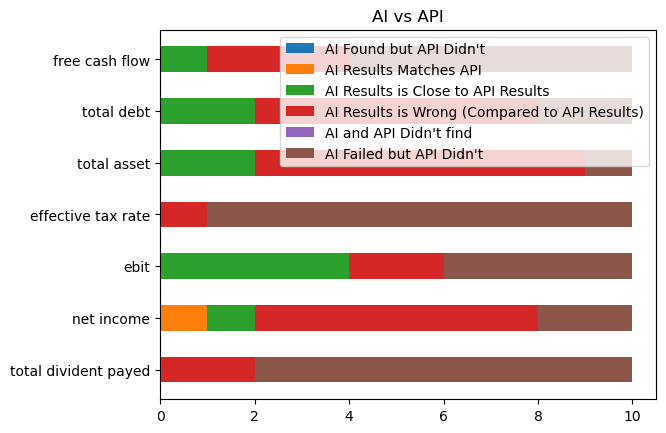

In [28]:
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(7)
for label, weight_count in weight_counts.items():

    p = ax.barh(things, weight_count, width, label=label, left = bottom)
    bottom += weight_count

ax.set_title("AI vs API")
ax.legend(loc="upper right")

plt.show()